In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False
import seaborn as sns

In [2]:
import pandas as pd
df_TOCC=pd.read_csv("../../datasets/UsingChart_TypeOfContractChannel.csv")
df_TOCC[:3]

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0
2,66756657,렌탈,Normal,홈쇼핑/방송,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,8.0,우리은행,정상,60.0,2363.0


In [3]:
df_TOCC['type_of_contract'].value_counts()

렌탈     46481
멤버십     4819
Name: type_of_contract, dtype: int64

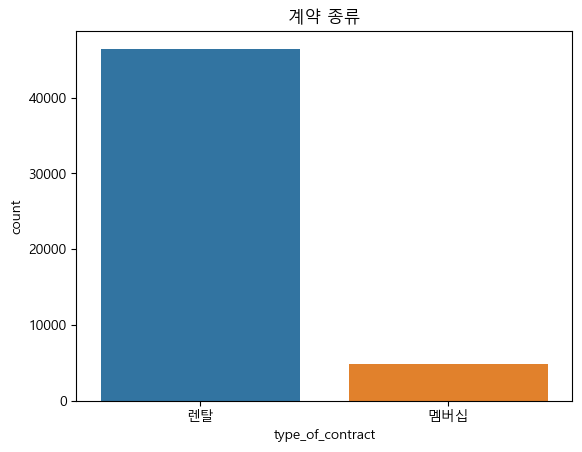

In [4]:
sns.countplot(data=df_TOCC, x='type_of_contract')
plt.title("계약 종류")
plt.show()

In [5]:
df_TOCC['bank'].value_counts()

국민은행         9901
롯데카드         9518
농협은행         6278
신한은행         3522
우리은행         3386
기업은행         1963
신한카드         1533
하나은행         1446
국민카드         1311
BC카드         1264
새마을금고         964
부산은행          888
삼성카드          884
현대카드          876
대구은행          746
우체국           717
외환은행          586
외환카드          530
경남은행          442
SC제일은행        439
광주은행          347
신협중앙회         341
전북은행          195
씨티은행          162
수협중앙회         160
제주은행           40
유안타증권          27
산업은행           23
현대증권           11
삼성증권            7
하나SK            6
미래에셋증권          5
NH농협카드          4
한국투자증권          4
신한금융투자          4
우리카드            3
대우증권            2
하이투자증권          1
메리츠종합금융증권       1
수협카드            1
상호저축은행          1
SK증권            1
하나대투증권          1
산림조합중앙회         1
대신증권            1
씨티카드            1
Name: bank, dtype: int64

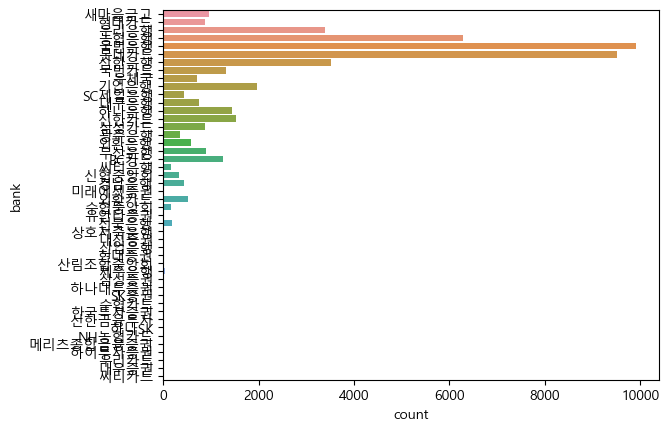

In [6]:
sns.countplot(data=df_TOCC, y='bank')
plt.show()

In [7]:
# 거래 은행 중 상위 7개 확인 (bank column -> 항목 serise -> index 축출 -> list 변환 -> slicing 7)
order_list = df_TOCC['bank'].value_counts().index.to_list()[:7]
order_list

['국민은행', '롯데카드', '농협은행', '신한은행', '우리은행', '기업은행', '신한카드']

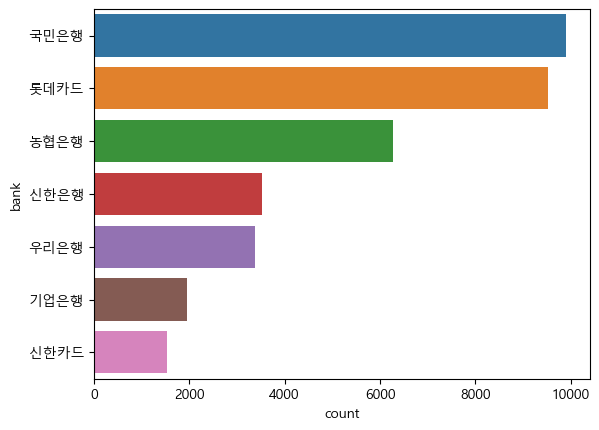

In [8]:
# sns.countplot(data=df_TOCC, y= 'back', order=['국민은행','롯데카드','BC카드'])
sns.countplot(data=df_TOCC, y='bank', order=order_list)
plt.show()

#### X(설명변수) / Y(목표변수) : 범주형 / 연속형

In [9]:
df_TOCC.columns

Index(['id', 'type_of_contract', 'type_of_contract2', 'channel', 'datetime',
       'Term', 'payment_type', 'product', 'amount', 'state', 'overdue_count',
       'overdue', 'credit rating', 'bank', 'cancellation', 'age', 'Mileage'],
      dtype='object')

In [10]:
df_TOCC['amount'].describe()

count     51304.000000
mean      93994.980021
std       15305.147334
min       54603.000000
25%       81900.000000
50%       96900.000000
75%       98400.000000
max      215700.000000
Name: amount, dtype: float64

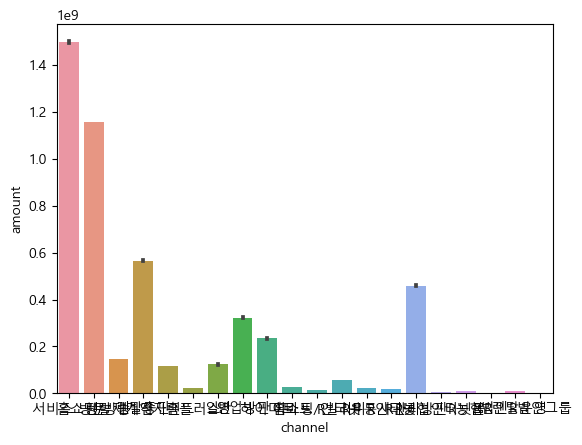

In [11]:
# sns.barplot(data=df_TOCC, x='channel' , y='amount') # 기본 평균
sns.barplot(data=df_TOCC, x='channel' , y='amount', estimator=sum) # 기본 총합
plt.show()

In [12]:
df_TOCC_sum = pd.pivot_table(data=df_TOCC, index='channel', values='amount', aggfunc=sum)
df_TOCC_bottom_list = df_TOCC_sum.sort_values(by='amount', ascending=False).iloc[-7:].index.to_list()

<Axes: xlabel='channel', ylabel='amount'>

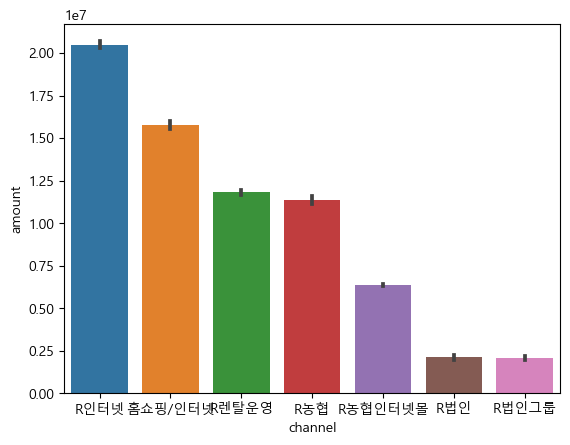

In [13]:
sns.barplot(data=df_TOCC, x='channel' , y='amount', estimator=sum, order=df_TOCC_bottom_list) # 하위 7개 순위 표현

<Axes: xlabel='channel', ylabel='amount'>

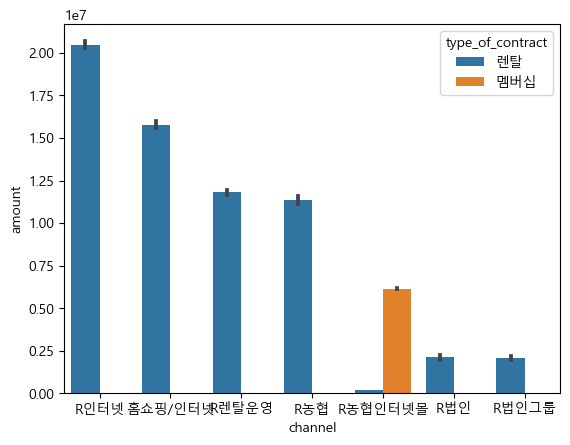

In [14]:
sns.barplot(data=df_TOCC, x='channel' , y='amount', estimator=sum, order=df_TOCC_bottom_list, hue='type_of_contract') # 하위 7개 순위 표현

#### quest 1
- x = 'product', y = 'amount'
- order by : top 3(amount)
- hue = 'type_of contract'

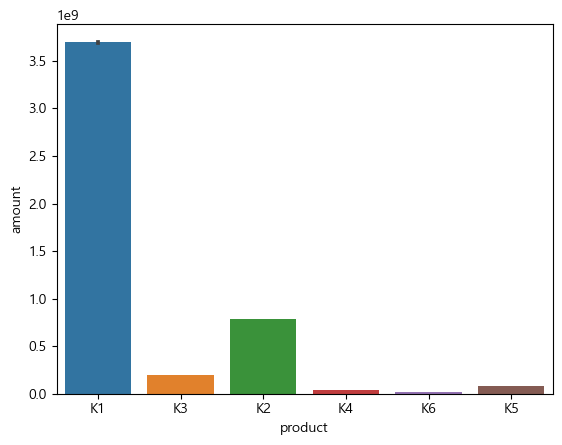

In [15]:
sns.barplot(data=df_TOCC, x='product' , y='amount', estimator=sum)
plt.show()

In [16]:
df_TOCC_sum = pd.pivot_table(data=df_TOCC, index='product', values='amount', aggfunc=sum)
df_TOCC_bottom3 = df_TOCC_sum.sort_values(by='amount', ascending=False).iloc[:3].index.to_list()

In [17]:
df_TOCC_sum.sort_values(by='amount', ascending=False)

,amount
product,
K1,3695172705
K2,787567890
K3,197181960
K5,77236500
K4,42328500
K6,22734000


In [18]:
df_TOCC_sum.sort_values(by='amount', ascending=False).iloc[:3]

,amount
product,
K1,3695172705
K2,787567890
K3,197181960


<Axes: xlabel='product', ylabel='amount'>

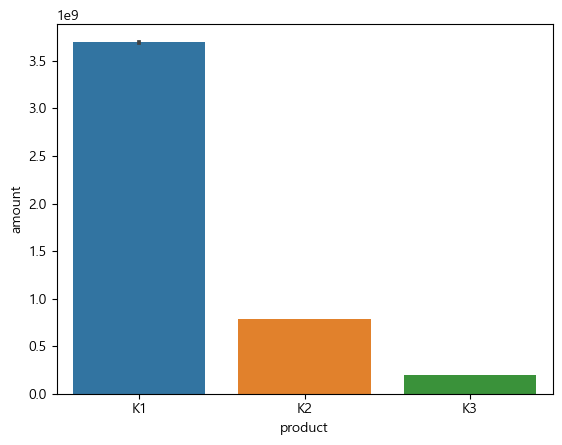

In [19]:
sns.barplot(data=df_TOCC, x='product' , y='amount', estimator=sum, order=df_TOCC_bottom3)

<Axes: xlabel='product', ylabel='amount'>

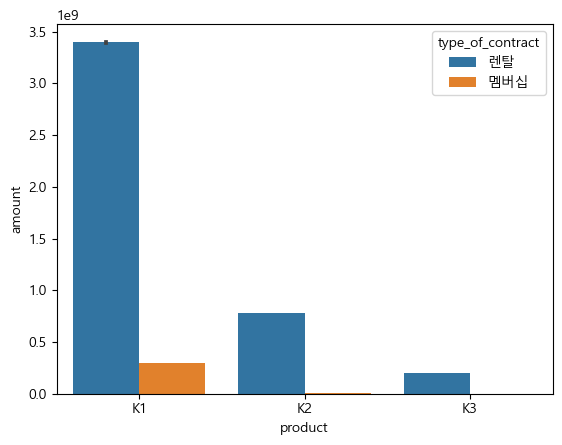

In [20]:
sns.barplot(data=df_TOCC, x='product' , y='amount', estimator=sum, order=df_TOCC_bottom3, hue='type_of_contract')